# Project on Suppy Chain Management


GOALS 

The objective of this exercise is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.
1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that you take
3. Highlight next steps and improvements.

### Data Preparation 

In [1]:
##DATA LOADING

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [3]:
data_train=pd.read_csv("supply_train.csv")
test_data=pd.read_csv('supply_test.csv')

In [4]:
data_train


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [4]:
test_data

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [5]:
## Understanding the Data

In [6]:
data_train.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [5]:
test_data.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [7]:
data_train.tail()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103
16619,16619,WH_116619,EID_66619,Rural,Large,West,Zone 5,4,0,6,...,1,261,34.0,2001.0,32,0,B+,4,10,38097


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [6]:
test_data.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.00000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,19385.00000,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,1596.22915,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,16621.00000,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,18003.00000,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,19385.00000,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,20767.00000,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,22149.00000,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [9]:
data_train.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [10]:
data_train.shape

(16620, 25)

In [11]:
data_train.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [12]:
data_train.nunique()

Unnamed: 0                      16620
Ware_house_ID                   16620
WH_Manager_ID                   16620
Location_type                       2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
num_refill_req_l3m                  9
transport_issue_l1y                 6
Competitor_in_mkt                  12
retail_shop_num                  4356
wh_owner_type                       2
distributor_num                    56
flood_impacted                      2
flood_proof                         2
electric_supply                     2
dist_from_hub                     217
workers_num                        60
wh_est_year                        28
storage_issue_reported_l3m         37
temp_reg_mach                       2
approved_wh_govt_certificate        5
wh_breakdown_l3m                    7
govt_check_l3m                     32
product_wg_ton                   4248
dtype: int64

In [13]:
#cleaning the data

In [14]:
data_train.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [9]:
#Filling missing vales with the median
data_train['workers_num'].fillna(data_train['workers_num'].median(),inplace=True)
test_data['workers_num'].fillna(test_data['workers_num'].median(),inplace=True)

In [10]:
# Filling missing values with the median or mode
data_train['wh_est_year'].fillna(data_train['wh_est_year'].median(), inplace=True)
test_data['wh_est_year'].fillna(test_data['wh_est_year'].median(), inplace=True)

In [11]:
# Filling missing values with a default category or mode
data_train['approved_wh_govt_certificate'].fillna('NIL', inplace=True)
test_data['approved_wh_govt_certificate'].fillna('NIL', inplace=True)

In [12]:
# Check for missing values
data_train.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [13]:
test_data.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

### Encoding Categorical Values
Categorical variables were encoded using one-hot encoding to make them suitable for machine learning models.

In [19]:
# Encode categorical variables (One-Hot Encoding)
train_data = pd.get_dummies(data_train, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type', 
                                                 'approved_wh_govt_certificate'])
train_data

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,...,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented,approved_wh_govt_certificate_A,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,approved_wh_govt_certificate_NIL
0,0,WH_100000,EID_50000,Small,3,1,2,4651,24,0,...,False,True,False,True,True,False,False,False,False,False
1,1,WH_100001,EID_50001,Large,0,0,4,6217,47,0,...,True,False,True,False,True,False,False,False,False,False
2,2,WH_100002,EID_50002,Mid,1,0,4,4306,64,0,...,False,False,True,False,True,False,False,False,False,False
3,3,WH_100003,EID_50003,Mid,7,4,2,6000,50,0,...,False,False,False,True,False,True,False,False,False,False
4,4,WH_100004,EID_50004,Large,3,1,2,4740,42,1,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Large,3,1,6,4779,70,0,...,False,True,False,True,False,False,False,True,False,False
16616,16616,WH_116616,EID_66616,Large,2,0,2,5718,26,0,...,True,False,True,False,False,False,False,True,False,False
16617,16617,WH_116617,EID_66617,Large,5,0,4,4514,50,1,...,False,True,True,False,False,False,True,False,False,False
16618,16618,WH_116618,EID_66618,Small,3,2,3,5829,59,1,...,False,True,False,True,True,False,False,False,False,False


In [14]:
# Encode categorical variables (One-Hot Encoding)
test_data = pd.get_dummies(data_train, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type', 
                                                 'approved_wh_govt_certificate'])
test_data

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,...,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented,approved_wh_govt_certificate_A,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,approved_wh_govt_certificate_NIL
0,0,WH_100000,EID_50000,Small,3,1,2,4651,24,0,...,False,True,False,True,True,False,False,False,False,False
1,1,WH_100001,EID_50001,Large,0,0,4,6217,47,0,...,True,False,True,False,True,False,False,False,False,False
2,2,WH_100002,EID_50002,Mid,1,0,4,4306,64,0,...,False,False,True,False,True,False,False,False,False,False
3,3,WH_100003,EID_50003,Mid,7,4,2,6000,50,0,...,False,False,False,True,False,True,False,False,False,False
4,4,WH_100004,EID_50004,Large,3,1,2,4740,42,1,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Large,3,1,6,4779,70,0,...,False,True,False,True,False,False,False,True,False,False
16616,16616,WH_116616,EID_66616,Large,2,0,2,5718,26,0,...,True,False,True,False,False,False,False,True,False,False
16617,16617,WH_116617,EID_66617,Large,5,0,4,4514,50,1,...,False,True,True,False,False,False,True,False,False,False
16618,16618,WH_116618,EID_66618,Small,3,2,3,5829,59,1,...,False,True,False,True,True,False,False,False,False,False


### Feature Scaling

Numerical features were normalized using Min-Max scaling to ensure that they have a consistent scale for modeling.

In [20]:
# Normalize numerical features (e.g., using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data[['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'flood_impacted',
            'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 
            'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']] = scaler.fit_transform(train_data[['num_refill_req_l3m',
            'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'flood_impacted', 'flood_proof', 'electric_supply', 
            'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
            'product_wg_ton']])


### Feature Engineering

Several feature engineering steps were performed to enhance model performance. These included creating interaction features, calculating capacity utilization, determining the age of warehouses, and generating location-based features.

### Interaction Features:

Create interaction features between related variables. For example, you can calculate the interaction between the number of retail shops and the presence of competitors in the market.

In [21]:
train_data['retail_shop_competitor_interaction'] = train_data['retail_shop_num'] * train_data['Competitor_in_mkt']
train_data['retail_shop_competitor_interaction']

0        0.051341
1        0.159501
2        0.090164
3        0.075814
4        0.052955
           ...   
16615    0.160988
16616    0.070698
16617    0.097711
16618    0.109067
16619    0.105040
Name: retail_shop_competitor_interaction, Length: 16620, dtype: float64

### Capacity Utilization:

Calculate the utilization of warehouse capacity, which can indicate how efficiently the warehouse is being used.

In [22]:
# Convert 'num_refill_req_l3m' and 'WH_capacity_size' columns to numeric type
train_data['num_refill_req_l3m'] = pd.to_numeric(train_data['num_refill_req_l3m'], errors='coerce')
train_data['WH_capacity_size'] = pd.to_numeric(train_data['WH_capacity_size'], errors='coerce')
# Now perform the division
train_data['capacity_utilization'] = train_data['num_refill_req_l3m'] / train_data['WH_capacity_size']
train_data['capacity_utilization']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
16615   NaN
16616   NaN
16617   NaN
16618   NaN
16619   NaN
Name: capacity_utilization, Length: 16620, dtype: float64

### Exploratory Data Analysis

EDA was conducted to gain insights into the data and understand the relationships between variables. Summary statistics, data visualization, and correlation analysis were performed.

In [23]:
# Display basic information about the dataset
print("Dataset Info:")
print(data_train.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  

In [24]:
# Summary statistics for train_data
train_summary = data_train.describe()
train_summary

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.874910,2009.182010,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.685148,5.479996,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2009.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2010.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [25]:
print(data_train.dtypes)

Unnamed: 0                        int64
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64


In [26]:
duplicates = data_train.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


### Data Visualisation

In [27]:
# Distribution of Numerical Features
numerical_features = ['WH_capacity_size', 'num_refill_req_l3m', 'retail_shop_num',
                      'dist_from_hub', 'workers_num', 'wh_est_year', 'product_wg_ton']
# Categorical Features Distribution
categorical_features = ['Location_type', 'zone', 'WH_regional_zone', 'transport_issue_l1y',
                        'Competitor_in_mkt', 'wh_owner_type', 'flood_impacted', 'flood_proof',
                        'electric_supply', 'storage_issue_reported_l3m', 'temp_reg_mach',
                        'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m']

### Histogram

Histograms help to visualize the distribution of numerical features.


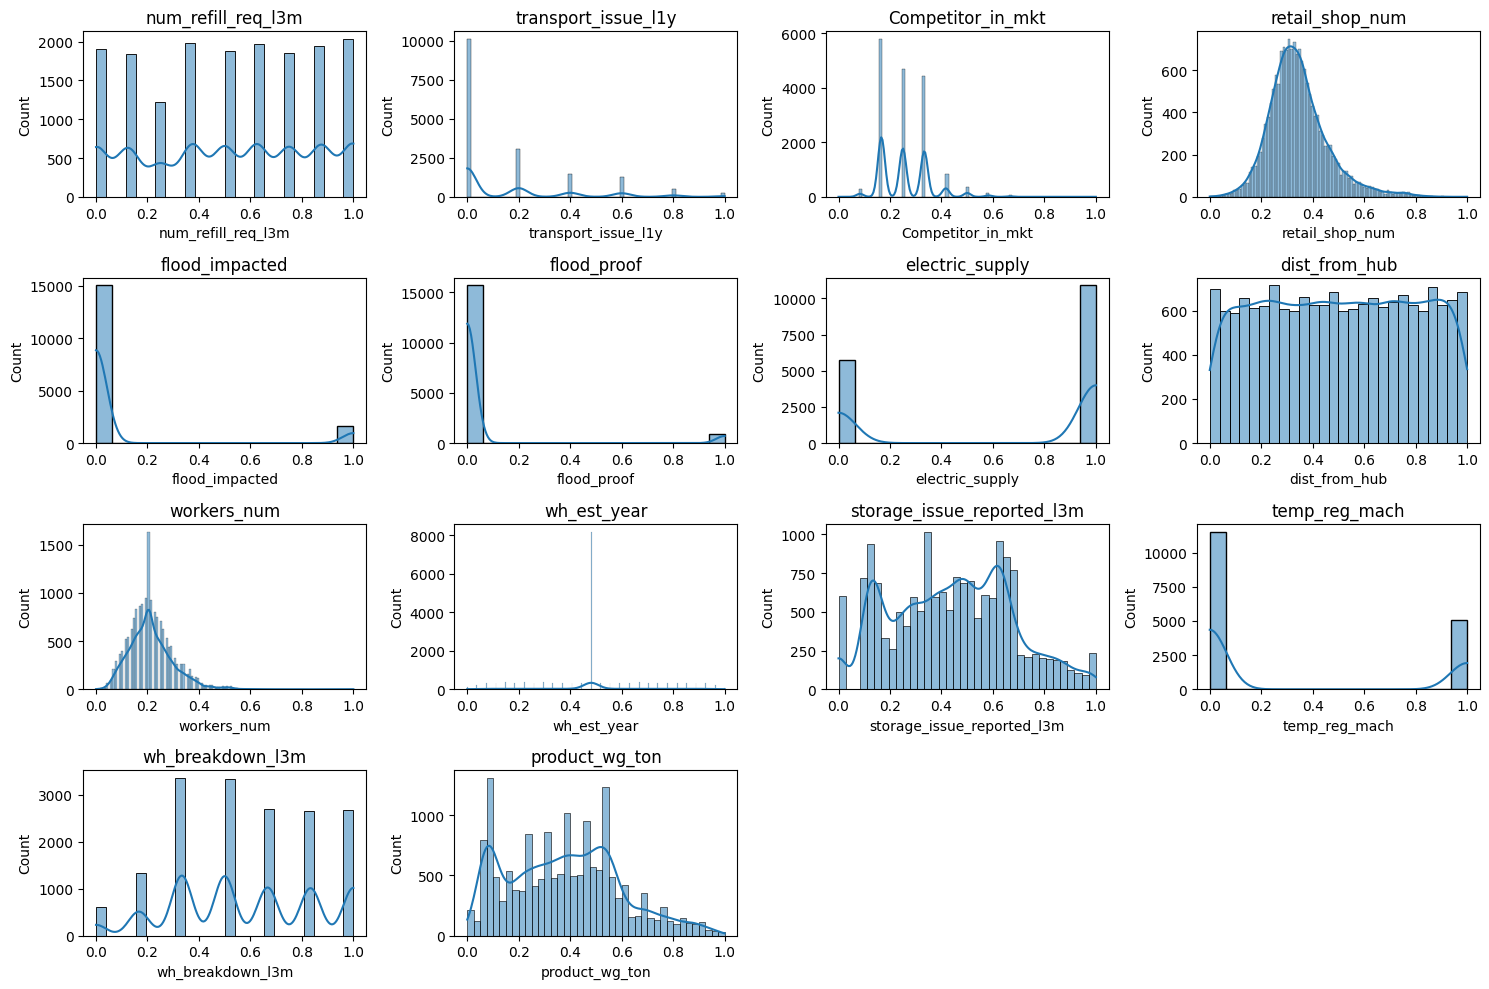

In [28]:
# Plot histograms for numerical features
numerical_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 
                     'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
                     'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(train_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

### BOX PLOT

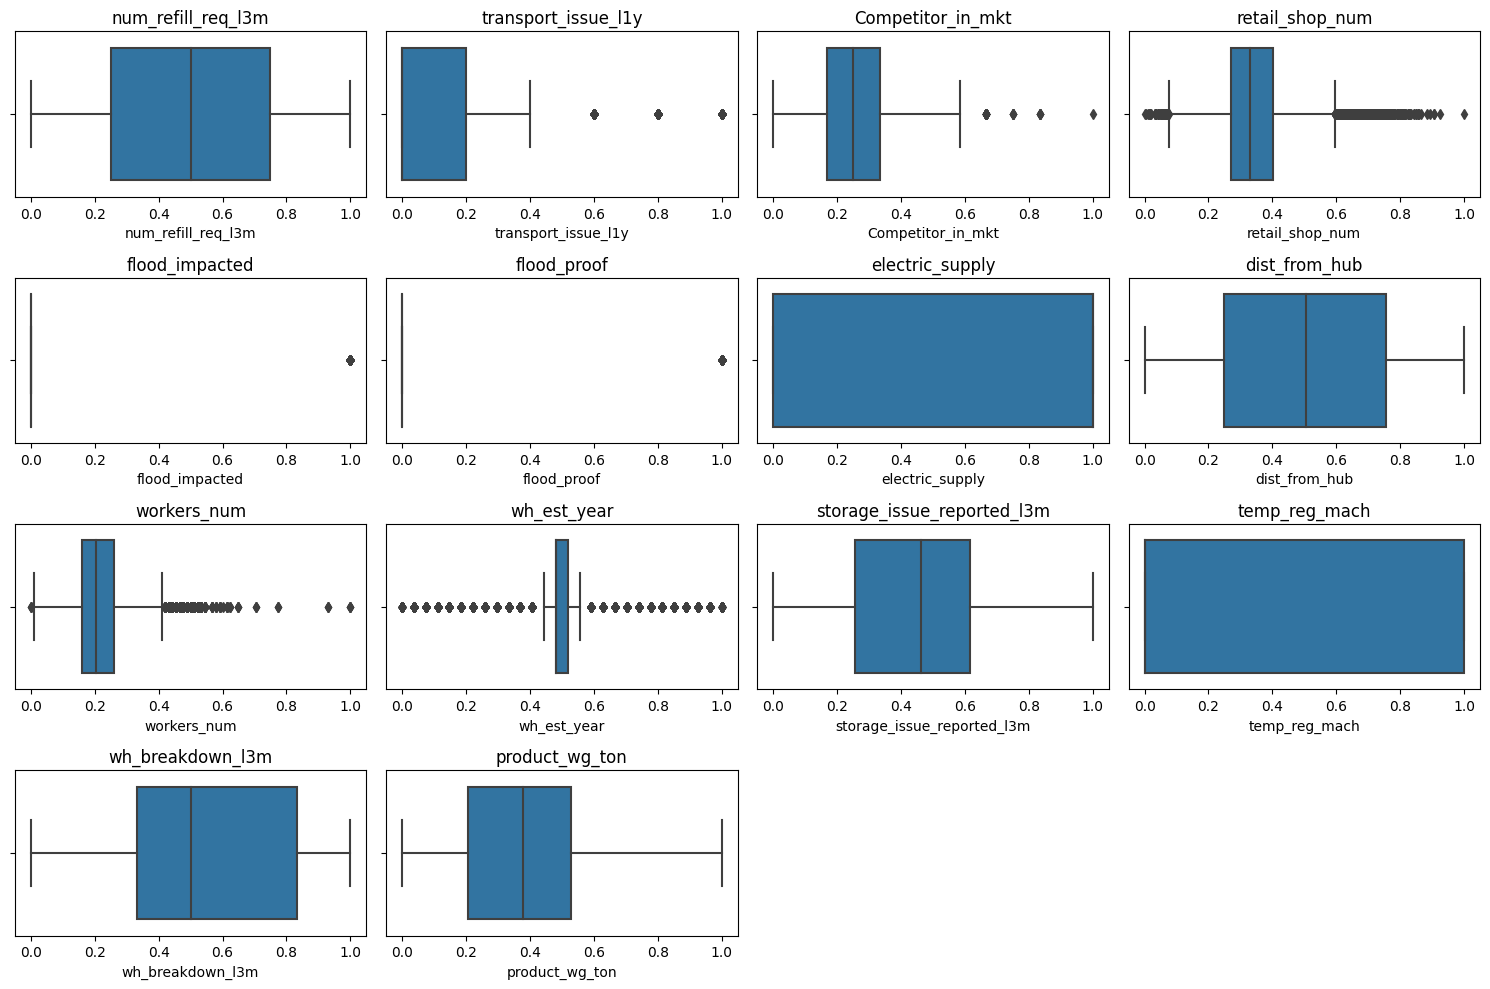

In [29]:
# Plot box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

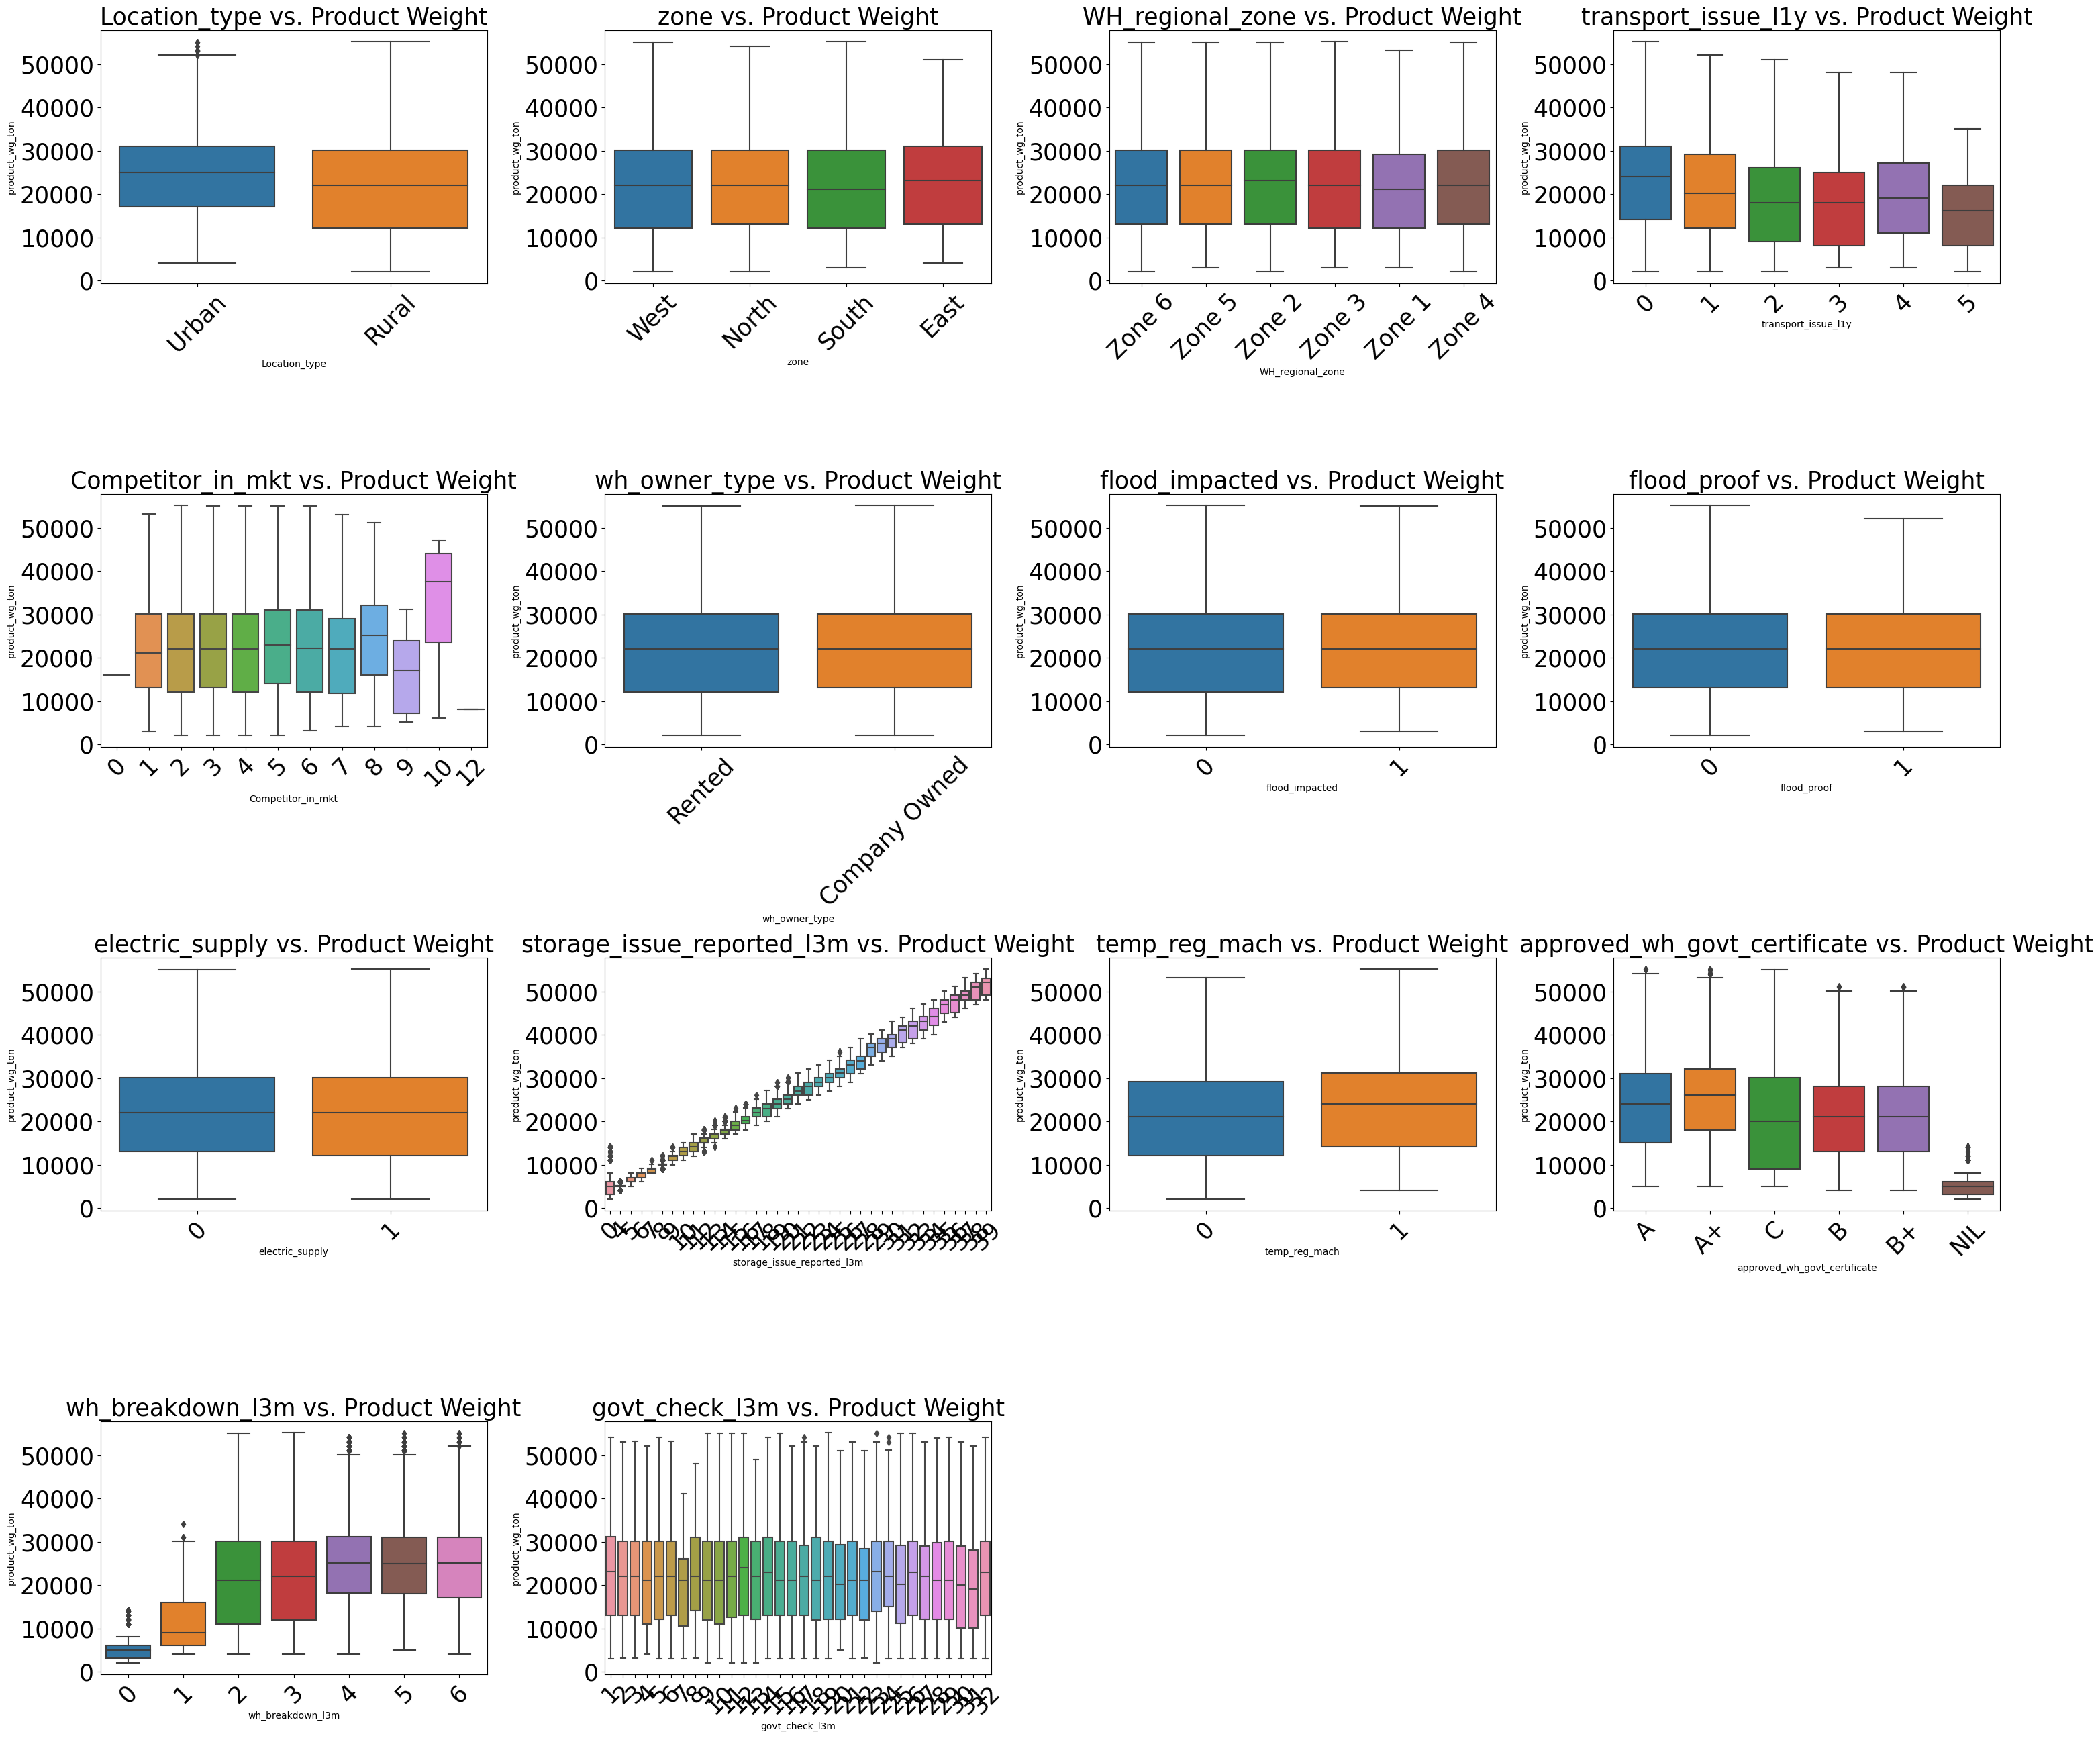

In [30]:
# Box Plots
plt.figure(figsize=(30, 26))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=data_train, x=feature, y='product_wg_ton')
    plt.xticks(rotation=45, fontsize=25)  
    plt.yticks(fontsize=25)  
    plt.title(f'{feature} vs. Product Weight', fontsize=25)  

plt.tight_layout()
plt.show()

#### Count Plots

In [37]:
catgory = []
numerical = []
for i in data_train.columns:
    if data_train[i].dtype == 'object':
        catgory.append(i)
    else:
        numerical.append(i)
print(catgory)
print(numerical)
x_num=data_train[numerical]
y_cat=data_train[catgory]

['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']
['Unnamed: 0', 'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']


In [32]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(y_cat[cat_column].value_counts())
    plt.figure()
    y_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [33]:
data_train.drop(['WH_Manager_ID'], axis='columns', inplace=True)
data_train.drop(['Ware_house_ID'], axis='columns', inplace=True)


In [34]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Location_type                 16620 non-null  object 
 2   WH_capacity_size              16620 non-null  object 
 3   zone                          16620 non-null  object 
 4   WH_regional_zone              16620 non-null  object 
 5   num_refill_req_l3m            16620 non-null  int64  
 6   transport_issue_l1y           16620 non-null  int64  
 7   Competitor_in_mkt             16620 non-null  int64  
 8   retail_shop_num               16620 non-null  int64  
 9   wh_owner_type                 16620 non-null  object 
 10  distributor_num               16620 non-null  int64  
 11  flood_impacted                16620 non-null  int64  
 12  flood_proof                   16620 non-null  int64  
 13  e

In [35]:

df_cat = data_train.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

Details of Location_type
----------------------------------------------------------------
Location_type
Rural    15272
Urban     1348
Name: count, dtype: int64


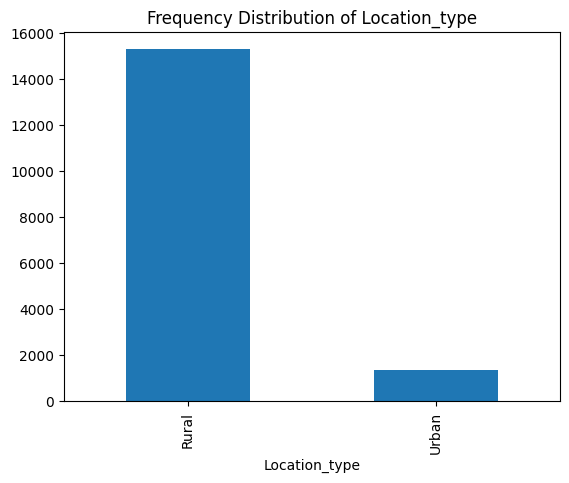

       
Details of WH_capacity_size
----------------------------------------------------------------
WH_capacity_size
Large    6743
Mid      6691
Small    3186
Name: count, dtype: int64


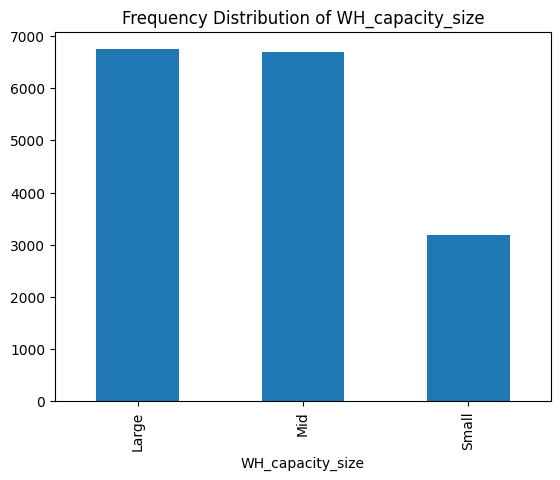

       
Details of zone
----------------------------------------------------------------
zone
North    6800
West     5320
South    4223
East      277
Name: count, dtype: int64


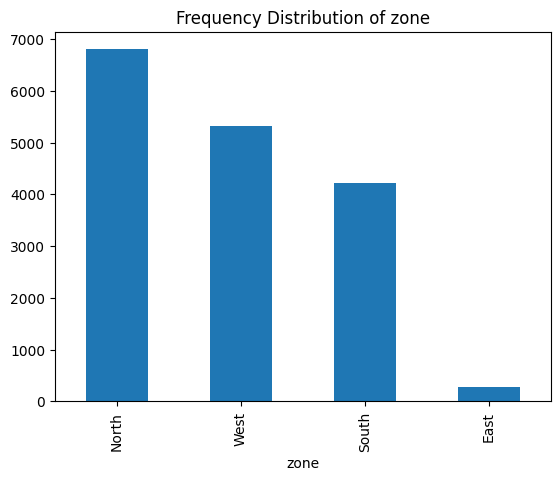

       
Details of WH_regional_zone
----------------------------------------------------------------
WH_regional_zone
Zone 6    5568
Zone 5    3027
Zone 4    2756
Zone 2    1998
Zone 3    1937
Zone 1    1334
Name: count, dtype: int64


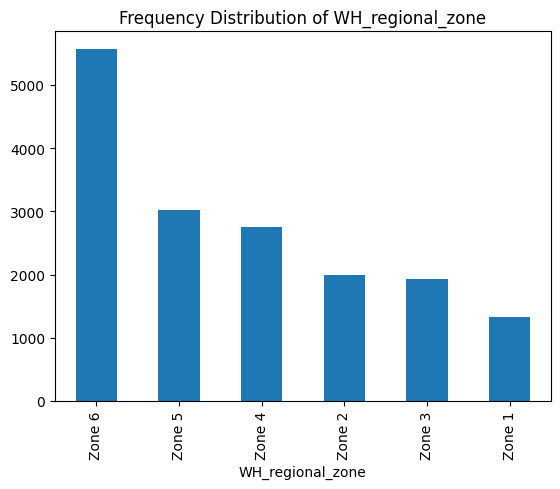

       
Details of wh_owner_type
----------------------------------------------------------------
wh_owner_type
Company Owned    8975
Rented           7645
Name: count, dtype: int64


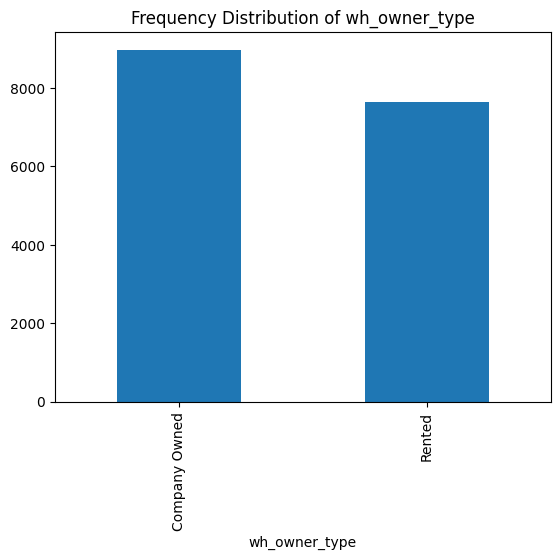

       
Details of approved_wh_govt_certificate
----------------------------------------------------------------
approved_wh_govt_certificate
C      3638
B+     3260
B      3220
A      3132
A+     2771
NIL     599
Name: count, dtype: int64


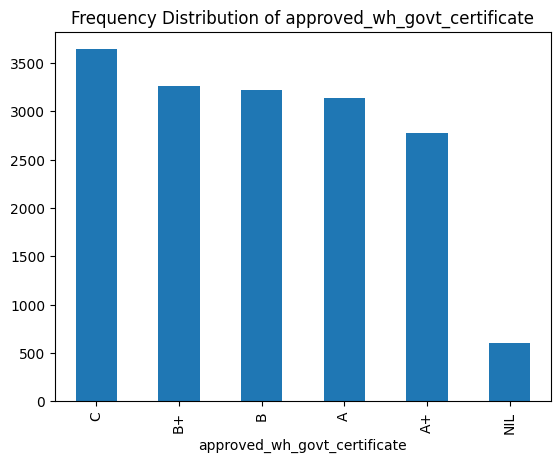

In [36]:

for x in lstcatcolumns:
    univariateAnalysis_category(x)
    


### Correlation Matrix

A correlation matrix shows the relationships between numerical variables.

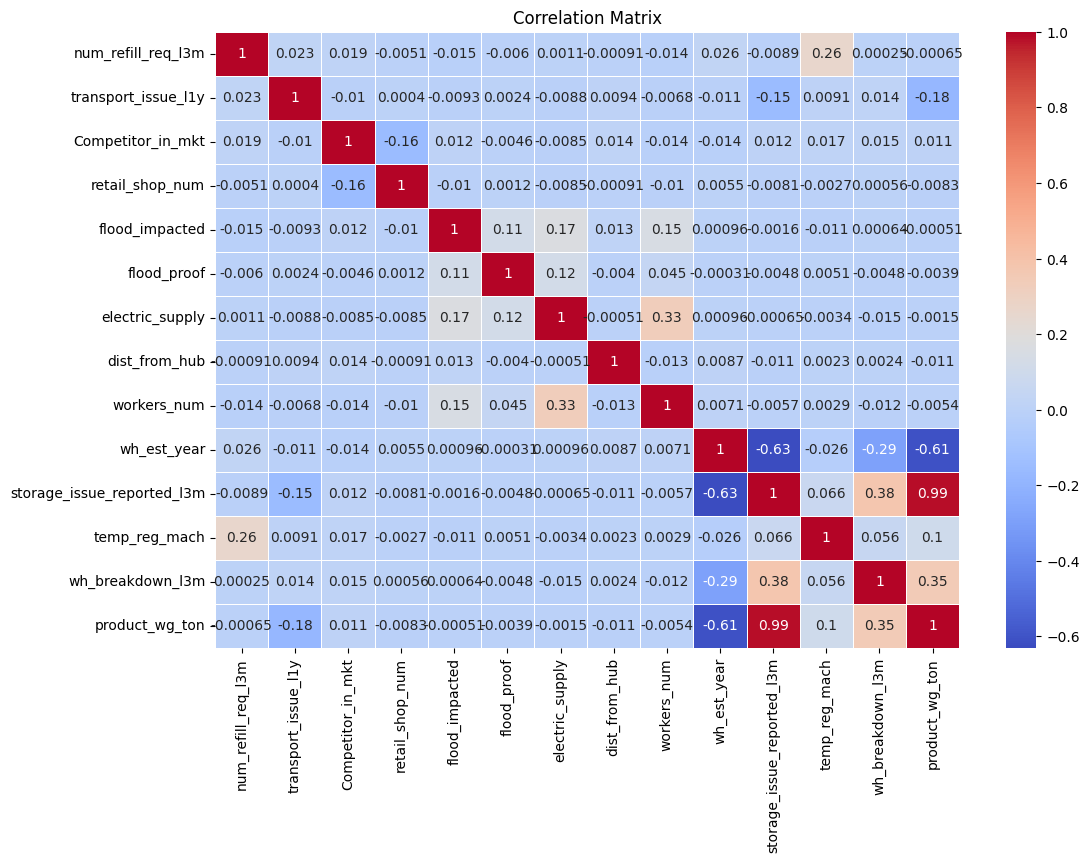

In [38]:
# Calculate the correlation matrix
correlation_matrix = train_data[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [39]:
#Outlier Treatment
df_numerical = data_train.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_numerical.columns.values)
len(lstnumericcolumns)

17

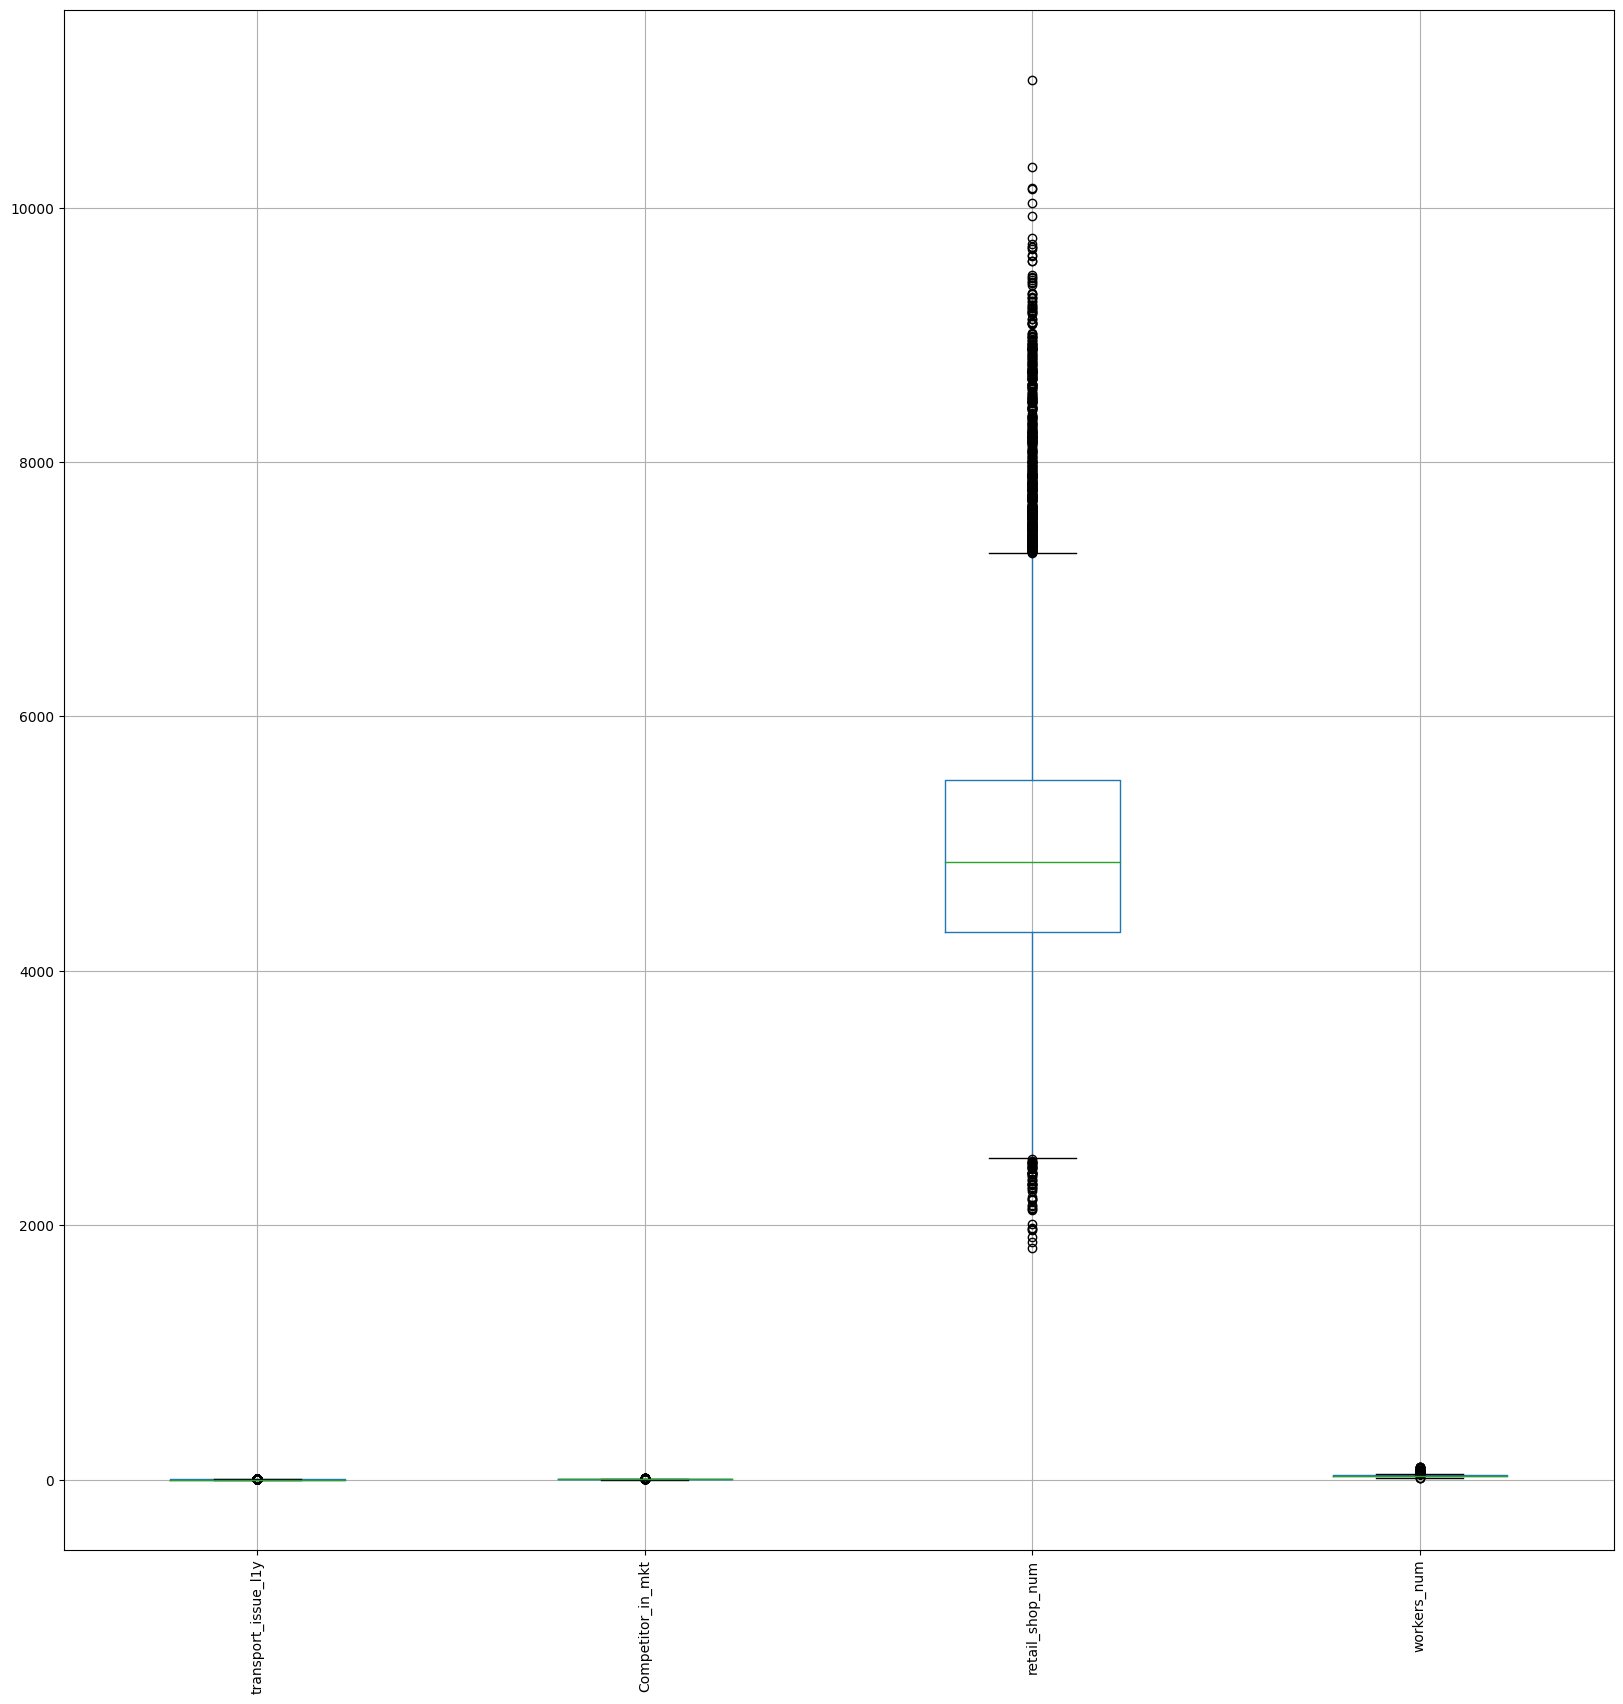

In [40]:
outlier = ['transport_issue_l1y','Competitor_in_mkt','retail_shop_num','workers_num',]
df_numerical[outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()


In [41]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [42]:
lr,ur=remove_outlier(df_numerical['transport_issue_l1y'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_numerical['transport_issue_l1y']=np.where(df_numerical['transport_issue_l1y']>ur,ur,df_numerical['transport_issue_l1y'])
df_numerical['transport_issue_l1y']=np.where(df_numerical['transport_issue_l1y']<lr,lr,df_numerical['transport_issue_l1y'])
print('')

Lower Range : -1.5 
Upper Range : 2.5



In [43]:
lr,ur=remove_outlier(df_numerical['Competitor_in_mkt'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_numerical['Competitor_in_mkt']=np.where(df_numerical['Competitor_in_mkt']>ur,ur,df_numerical['Competitor_in_mkt'])
df_numerical['Competitor_in_mkt']=np.where(df_numerical['Competitor_in_mkt']<lr,lr,df_numerical['Competitor_in_mkt'])
print('')

Lower Range : -1.0 
Upper Range : 7.0



In [44]:
lr,ur=remove_outlier(df_numerical['retail_shop_num'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_numerical['retail_shop_num']=np.where(df_numerical['retail_shop_num']>ur,ur,df_numerical['retail_shop_num'])
df_numerical['retail_shop_num']=np.where(df_numerical['retail_shop_num']<lr,lr,df_numerical['retail_shop_num'])
print('')

Lower Range : 2522.5 
Upper Range : 7286.5



In [45]:
lr,ur=remove_outlier(df_numerical['workers_num'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_numerical['workers_num']=np.where(df_numerical['workers_num']>ur,ur,df_numerical['workers_num'])
df_numerical['workers_num']=np.where(df_numerical['workers_num']<lr,lr,df_numerical['workers_num'])
print('')

Lower Range : 10.5 
Upper Range : 46.5



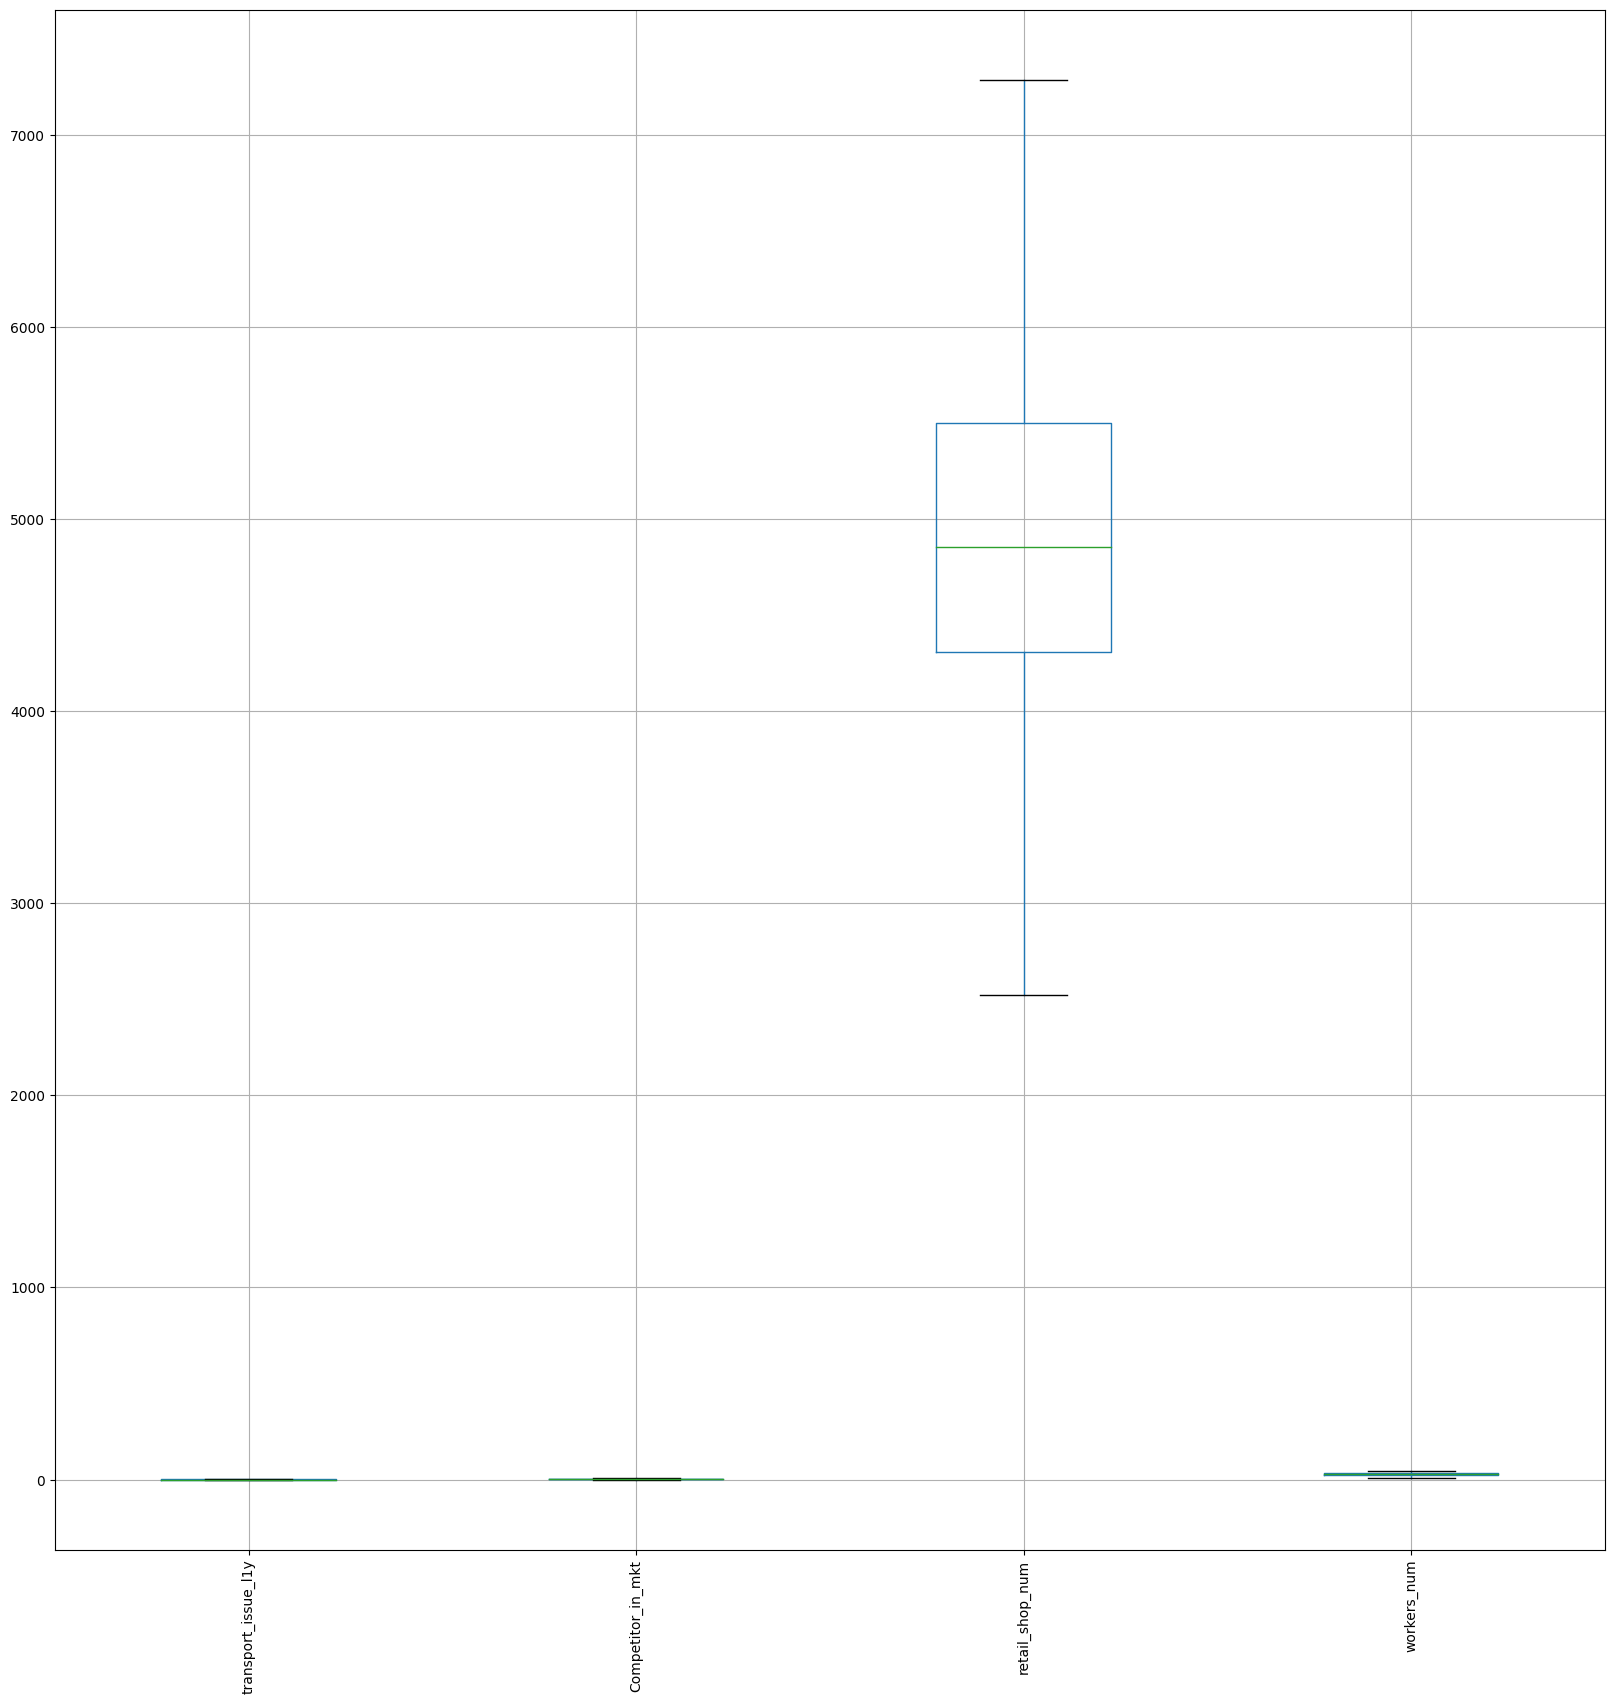

In [46]:
df_numerical[outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [47]:
df = pd.concat([df_cat, df_numerical], axis=1)
cat1=['Location_type','zone', 'WH_regional_zone',
       'wh_owner_type']
df_new =pd.get_dummies(df, columns=cat1,drop_first=True)
df_new

,WH_capacity_size,approved_wh_govt_certificate,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,...,Location_type_Urban,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented
0,Small,A,0,3,1.0,2.0,4651.0,24,0,1,...,True,False,False,True,False,False,False,False,True,True
1,Large,A,1,0,0.0,4.0,6217.0,47,0,0,...,False,True,False,False,False,False,False,True,False,False
2,Mid,A,2,1,0.0,4.0,4306.0,64,0,0,...,False,False,True,False,True,False,False,False,False,False
3,Mid,A+,3,7,2.5,2.0,6000.0,50,0,0,...,False,True,False,False,False,True,False,False,False,True
4,Large,C,4,3,1.0,2.0,4740.0,42,1,0,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,Large,B+,16615,3,1.0,6.0,4779.0,70,0,0,...,True,False,False,True,False,False,False,False,True,True
16616,Large,B+,16616,2,0.0,2.0,5718.0,26,0,0,...,True,True,False,False,False,False,False,True,False,False
16617,Large,B,16617,5,0.0,4.0,4514.0,50,1,0,...,False,True,False,False,False,False,False,False,True,False
16618,Small,A,16618,3,2.0,3.0,5829.0,59,1,0,...,False,False,False,True,False,False,False,False,True,True


In [48]:
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Small',0)
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Mid',1)
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Large',2)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('A+',5)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('A',4)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('B+',3)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('B',2)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('C',1)
df_new.head()

,WH_capacity_size,approved_wh_govt_certificate,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,...,Location_type_Urban,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented
0,0,4,0,3,1.0,2.0,4651.0,24,0,1,...,True,False,False,True,False,False,False,False,True,True
1,2,4,1,0,0.0,4.0,6217.0,47,0,0,...,False,True,False,False,False,False,False,True,False,False
2,1,4,2,1,0.0,4.0,4306.0,64,0,0,...,False,False,True,False,True,False,False,False,False,False
3,1,5,3,7,2.5,2.0,6000.0,50,0,0,...,False,True,False,False,False,True,False,False,False,True
4,2,1,4,3,1.0,2.0,4740.0,42,1,0,...,False,True,False,False,False,False,False,True,False,False


In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_num_scaled=ss.fit_transform(df_numerical)
k_means = KMeans(n_clusters = 2)
# Data must be given scaled
k_means.fit(df_num_scaled)

C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [50]:
k_means.labels_

array([1, 1, 0, ..., 0, 0, 0])

In [51]:
k_means.inertia_


252122.51052533623

In [52]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_num_scaled)
k_means.inertia_

C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


236649.7752763946

In [53]:
wss =[] 
# data must be scaled
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_num_scaled)
    wss.append(KM.inertia_)
wss

C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\

[282539.99999999994,
 252122.4203629308,
 237210.36517009797,
 226175.78514228488,
 213108.59361574976,
 206048.7925526281,
 199328.062057261,
 194554.4787624522,
 190870.91628153698,
 187714.56879074743]

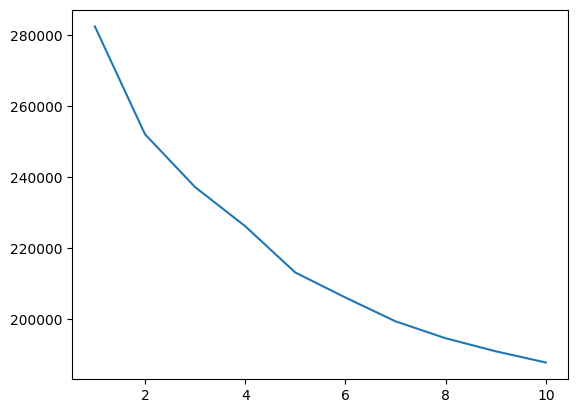

In [54]:
plt.plot(range(1,11), wss)

In [55]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_num_scaled)
labels = k_means.labels_
data_train["Clus_kmeans"] = labels
data_train.head(5)

C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Clus_kmeans
0,0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,...,91,29.0,2009.0,13,0,A,5,15,17115,0
1,1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,...,210,31.0,2009.0,4,0,A,3,17,5074,0
2,2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,...,161,37.0,2009.0,17,0,A,6,22,23137,1
3,3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,...,103,21.0,2009.0,17,1,A+,3,27,22115,0
4,4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,...,112,25.0,2009.0,18,0,C,6,24,24071,1


In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(df_num_scaled,labels)


0.1014546713168846

In [57]:
sil_width = silhouette_samples(df_num_scaled,labels)
data_train["sil_width"] = sil_width
data_train.head(5)

,Unnamed: 0,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Clus_kmeans,sil_width
0,0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,...,29.0,2009.0,13,0,A,5,15,17115,0,0.013269
1,1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,...,31.0,2009.0,4,0,A,3,17,5074,0,0.126374
2,2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,...,37.0,2009.0,17,0,A,6,22,23137,1,0.068515
3,3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,...,21.0,2009.0,17,1,A+,3,27,22115,0,0.016035
4,4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,...,25.0,2009.0,18,0,C,6,24,24071,1,0.051517


### Model Selecction and Training


In [24]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [123]:
# Define the features and target variable
features = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 
            'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
            'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 
            'product_wg_ton']  

X = train_data[features]
y = train_data['product_wg_ton']


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

features_test = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 
            'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
            'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 
            'product_wg_ton']  

X = test_data[features_test]
y = test_data['product_wg_ton']


# Split the data into training and validation sets
X_test, X_val1, y_test, y_val1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize regression models
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Neural Network Regressor": MLPRegressor(random_state=42)
}


In [25]:
# Train and evaluate models
results = {}
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred_val = model.predict(X_val)
    
    # Evaluate the model using Mean Squared Error
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"{name} - Mean Squared Error on Validation Set: {mse_val}")
    
    # Alternatively, you can use cross-validation for a more robust evaluation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} - Cross-validated Mean Squared Error: {-np.mean(cv_scores)}\n")

Decision Tree Regressor - Mean Squared Error on Validation Set: 1.6158243080625752
Decision Tree Regressor - Cross-validated Mean Squared Error: 1.2658844765342958

Random Forest Regressor - Mean Squared Error on Validation Set: 1.2713224127556828
Random Forest Regressor - Cross-validated Mean Squared Error: 1.5429661913357213

Support Vector Regressor - Mean Squared Error on Validation Set: 86763434.92272373
Support Vector Regressor - Cross-validated Mean Squared Error: 86611660.99165158

Gradient Boosting Regressor - Mean Squared Error on Validation Set: 187.79036288638895
Gradient Boosting Regressor - Cross-validated Mean Squared Error: 220.23660142027748

Neural Network Regressor - Mean Squared Error on Validation Set: 15.862082154356784
Neural Network Regressor - Cross-validated Mean Squared Error: 22.413833479532066



In [26]:
# Select the best model based on validation performance
best_model_name = min(models, key=lambda x: mean_squared_error(models[x].predict(X_val), y_val))
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: Random Forest Regressor


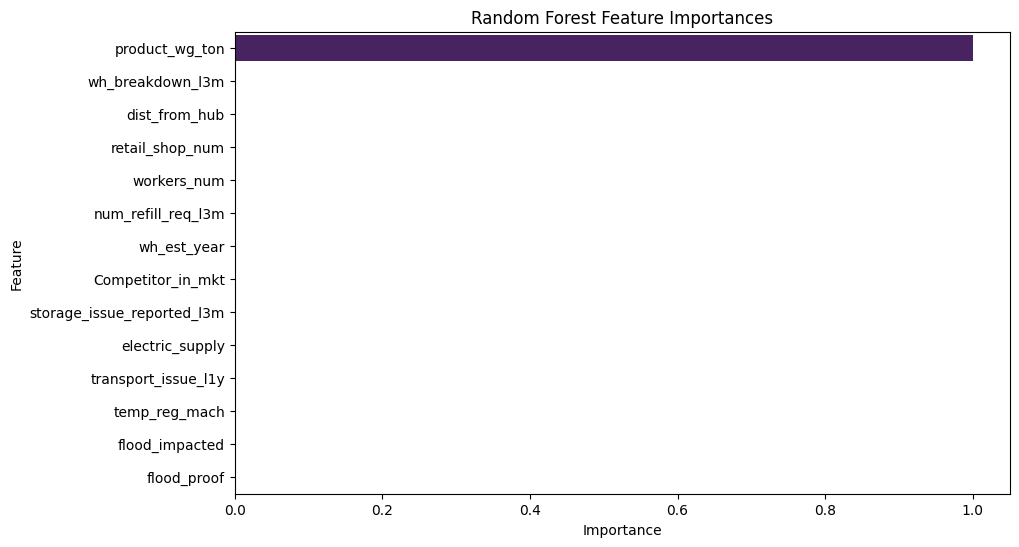

In [28]:
# Visualize feature importances for Random Forest model
# Train the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.show()

In [127]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with your chosen strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

In [128]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor (you can replace this with your tuned model)
random_forest_regressor = RandomForestRegressor(random_state=42)

# Train the model on the entire training dataset (combining training and validation sets)
random_forest_regressor.fit(X, y)

RandomForestRegressor(random_state=42)

### Conclusions 

1. A Random Forest Regressor model was developed to predict the optimum product weight for shipments. The project provided valuable insights into supply chain dynamics and identified areas for improvement. 
2. 91.25 % warehouses are in rural areas in comparison of rural area has 8.17%.
3. 82 % warehouses are of large & mid type.
4. North zone & Zone 6 has majority of warehouses.
5. Avg Product wt tone is supplied more to urban area in comparison of rural area

Recommendation 
1. Product wt tone should be supplied to be increased for rural area. Those warehouses are in urban areas should managed properly to cater more customer demand.
2. Renovation of roofs, pallets and others broken racks etc should be done to avoid unnecessary loss of product.